In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import keras
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras import backend as K
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from IPython.display import display
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions
from sklearn.preprocessing import  MinMaxScaler

from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor


In [6]:
# load dataset
def grab_image( img_path, target_size=( 60, 40 ), normMethod = 1, printAll = False ):
    img = cv2.imread( img_path, 0 )
    img = cv2.resize( img, target_size )
    img = img.astype('float')
    
    if normMethod == 1:
        img = img / 255.0
    
    elif normMethod == 2:
        img = img - 128
        img = img/128.0
    
    else:
        img = img / 255.0
    
    if printAll:
        print(img.shape)
        print(img[0,0], img[20,20])
        plt.imshow( img )
    
    img = img.flatten()
    img = np.expand_dims(img, axis=0)
    x = preprocess_input(img)
    return x

def get_training_images( n = 1294, normMethod = 1, target_size = (60,40), printAll = False ):    

    X = np.concatenate([grab_image('/home/jts7n/miscImgs/model/%d_model.png'%(i) , normMethod=normMethod, target_size=target_size, printAll = printAll) for i in range(n)])
    return X

def get_human_scores( n=0, csvLoc = '/home/jts7n/miscImgs/scores/humanScores.txt' ):
    
    hScores = pd.read_csv( csvLoc, header=None )
    
    Y = hScores[0].values
    #Y = np.expand_dims(Y, axis=0)

    
    if n == 0:
        return Y
    else:
        return Y[:n]

(1294, 2400)
(1294,)
Epoch 1/100
905/905 [==============================] - 7s 8ms/step - loss: 3.8100 - mae: 1.2589 - accuracy: 0.0508
Epoch 2/100
905/905 [==============================] - 4s 4ms/step - loss: 3.3286 - mae: 0.9314 - accuracy: 0.0796
Epoch 3/100
905/905 [==============================] - 4s 5ms/step - loss: 0.5653 - mae: 0.3950 - accuracy: 0.1260
Epoch 4/100
905/905 [==============================] - 4s 4ms/step - loss: 0.1418 - mae: 0.1951 - accuracy: 0.1635
Epoch 5/100
905/905 [==============================] - 4s 5ms/step - loss: 0.0361 - mae: 0.1153 - accuracy: 0.1657
Epoch 6/100
905/905 [==============================] - 4s 4ms/step - loss: 0.0222 - mae: 0.1034 - accuracy: 0.1646
Epoch 7/100
905/905 [==============================] - 3s 4ms/step - loss: 0.0182 - mae: 0.0985 - accuracy: 0.1657
Epoch 8/100
905/905 [==============================] - 4s 5ms/step - loss: 0.0155 - mae: 0.0922 - accuracy: 0.1657
Epoch 9/100
905/905 [==============================] - 4s 5

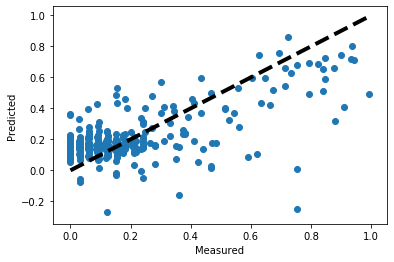

In [11]:
#dataset = pd.read_csv('')
#dataset.head(2)

#dataset.describe(include='all')

#sns.pairplot(dataset)

# split into input (X) and output (Y) variables
n = 1294
X = get_training_images( n, normMethod=2 )
print(X.shape)
y = get_human_scores( n )
print(y.shape)

sc= MinMaxScaler()
X= sc.fit_transform(X)
y= y.reshape(-1,1)
y=sc.fit_transform(y)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=2400, input_dim=2400))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
    return regressor

regressor = KerasRegressor(build_fn=build_regressor, batch_size=32,epochs=100)

results=regressor.fit(X_train,y_train)

y_pred= regressor.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()